In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

In [4]:
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]

threshold = 0.5
y_pred = ["positive" if score>=threshold else "negative" for score in pred_scores]

print(y_pred)

['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


In [7]:
r = np.flip(sklearn.metrics.confusion_matrix(y_true, y_pred))

print(r)

[[4 2]
 [1 3]]


In [8]:
precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label="positive")
print(precision)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="positive")
print(recall)

0.8
0.6666666666666666


In [9]:
thresholds = np.arange(start=0.2, stop=0.7, step=0.05)
print(thresholds)

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]


In [17]:
def precision_recall_curve(y_true, y_pred, thresholds):
    precisions=[]
    recalls=[]
    
    for threshold in thresholds:
        y_pred = ['positive' if score>=threshold else 'negative' for score in pred_scores]
        
        precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label='positive')
        recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label='positive')
        
        precisions.append(precision)
        recalls.append(recall)
    
    return precisions, recalls

In [18]:
precisions, recalls = precision_recall_curve(y_true, y_pred, thresholds)

In [19]:
print(precisions)
print(recalls)

[0.6, 0.5555555555555556, 0.5555555555555556, 0.5714285714285714, 0.5714285714285714, 0.8, 0.8, 1.0, 1.0, 1.0]
[1.0, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 0.3333333333333333]


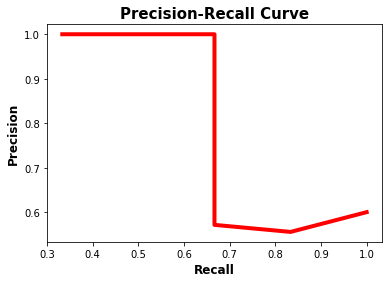

In [20]:
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()